In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('Amazon Sales data.csv')

In [16]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [17]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [18]:
print(df.columns)

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')


In [19]:
df.shape

(100, 14)

Region wise Units SOld

Text(0, 0.5, 'Units Sold')

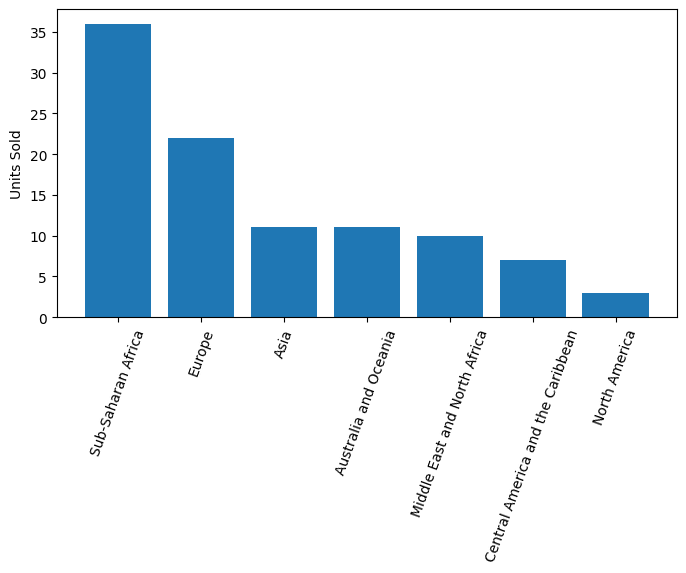

In [20]:
plt.figure(figsize=(8,4))
ndf=df.groupby('Region')['Units Sold'].count().sort_values(ascending=False)
plt.bar(ndf.index,ndf.values)
plt.xticks(rotation=70)
plt.ylabel('Units Sold')

Regionwise Revenue

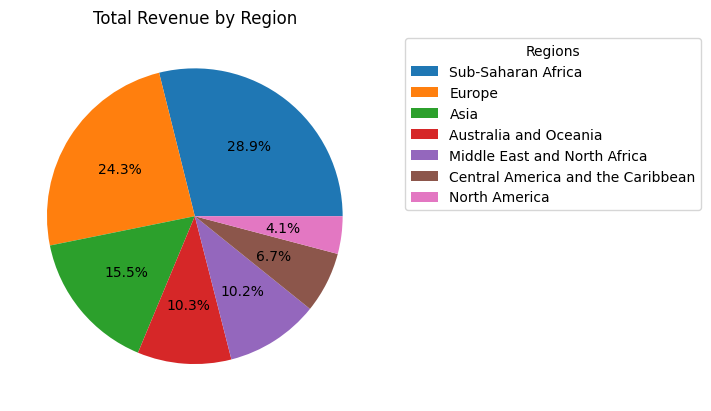

In [21]:
# plt.figure(figsize=(8, 4))
nndf=df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
plt.pie(nndf,autopct='%1.1f%%')
plt.title('Total Revenue by Region')
plt.legend(nndf.index, title="Regions", bbox_to_anchor=(1.05, 1), loc='upper left')

<Axes: >

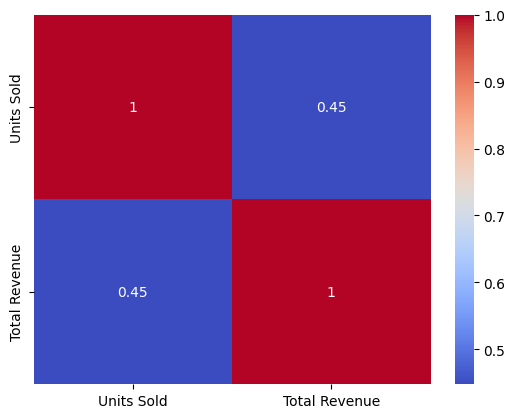

In [22]:
correlation_matrix = df[['Units Sold', 'Total Revenue']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')


Region Wise Profit


Text(0, 0.5, 'Profit')

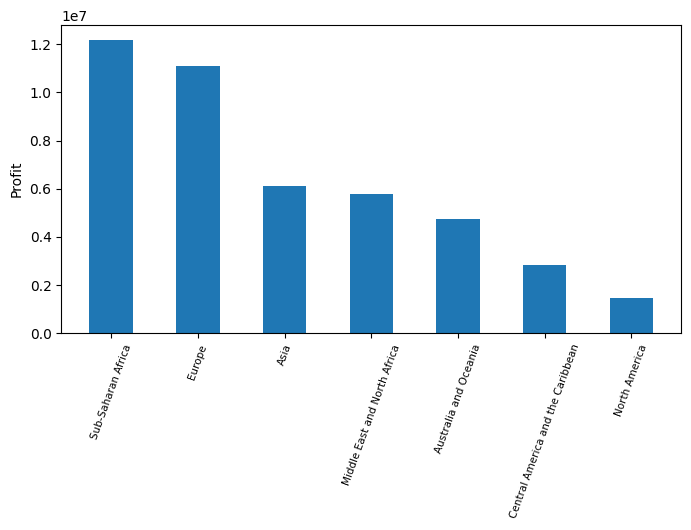

In [23]:
plt.figure(figsize=(8,4))
rpf=df.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)
plt.bar(rpf.index,rpf.values,width=0.5)
plt.xticks(rotation=70,fontsize=7.5)
plt.ylabel('Profit')

<Axes: >

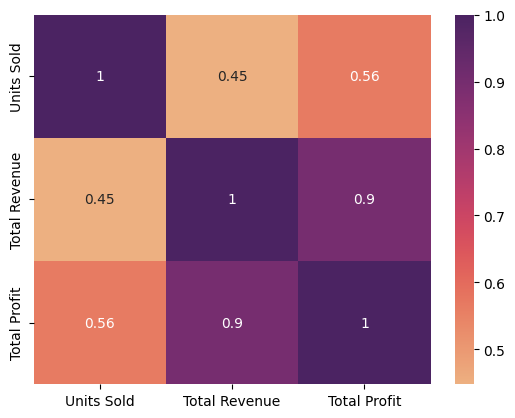

In [24]:
correlation_matrix = df[['Units Sold', 'Total Revenue','Total Profit']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='flare')

COstly products made by which Regions??


Text(0, 0.5, 'Total Cost')

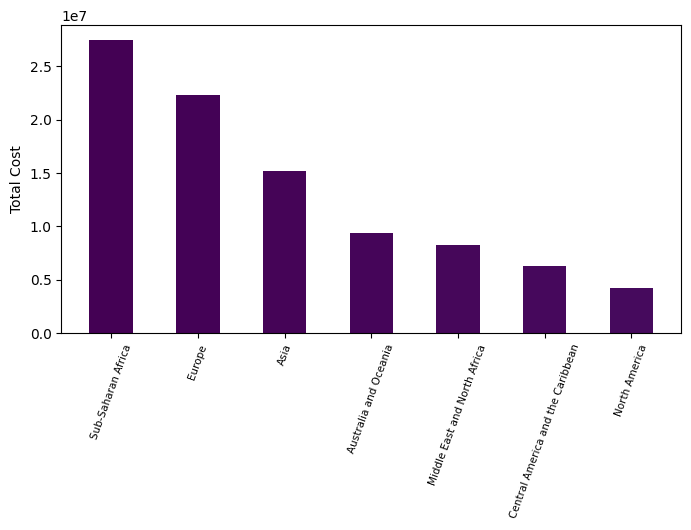

In [25]:
plt.figure(figsize=(8,4))
pf=df.groupby('Region')['Total Cost'].sum().sort_values(ascending=False)
colors = plt.cm.viridis(range(len(pf)))
plt.bar(pf.index,pf.values,width=0.5,color=colors)
plt.xticks(rotation=70,fontsize=7.5)
plt.ylabel('Total Cost')

<Axes: >

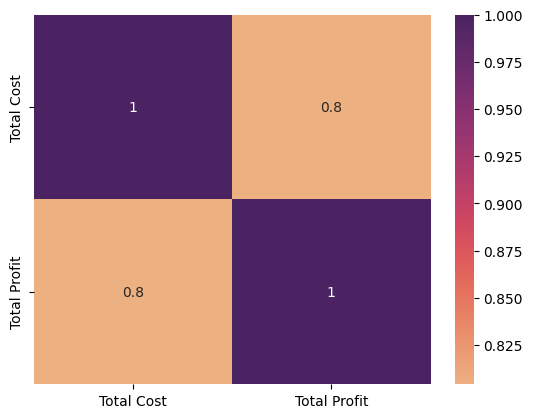

In [26]:
correlation_matrix = df[['Total Cost','Total Profit']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='flare')

Profit and Their item types

Text(0.5, 1.0, 'Item Types and Profits')

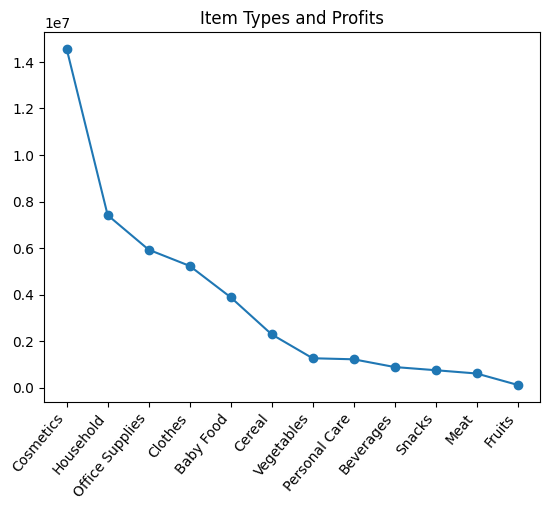

In [27]:
pitem=df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
plt.plot(pitem.index,pitem.values,'o-')
plt.xticks(rotation=50,ha='right')
plt.title('Item Types and Profits')
# plt.legend(pitem.index, title="Item types", bbox_to_anchor=(1.05, 1), loc='upper left')

In [28]:
print(pitem.index[0])
print(pitem.iloc[0])

Cosmetics
14556048.66


Country With the Highest Profit

In [29]:
df.Country

0                    Tuvalu
1                   Grenada
2                    Russia
3     Sao Tome and Principe
4                    Rwanda
              ...          
95                     Mali
96                 Malaysia
97             Sierra Leone
98                   Mexico
99               Mozambique
Name: Country, Length: 100, dtype: object

Text(0, 0.5, 'Profit')

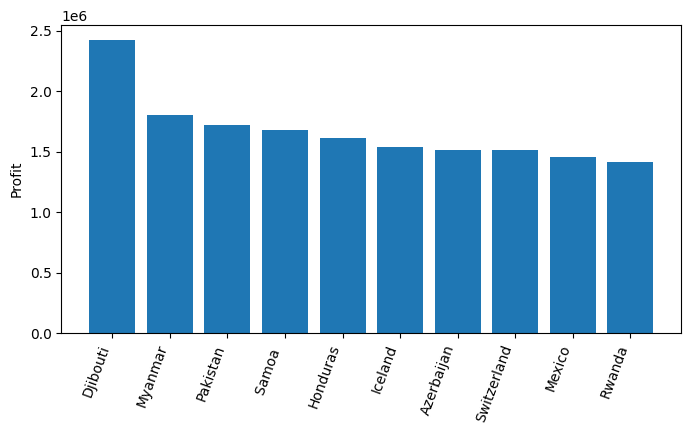

In [30]:
plt.figure(figsize=(8,4))
c=df.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(10)
plt.bar(c.index,c.values)
plt.xticks(rotation=70,ha='right')
plt.ylabel('Profit')

Country with high revenues

Text(0, 0.5, 'Profit')

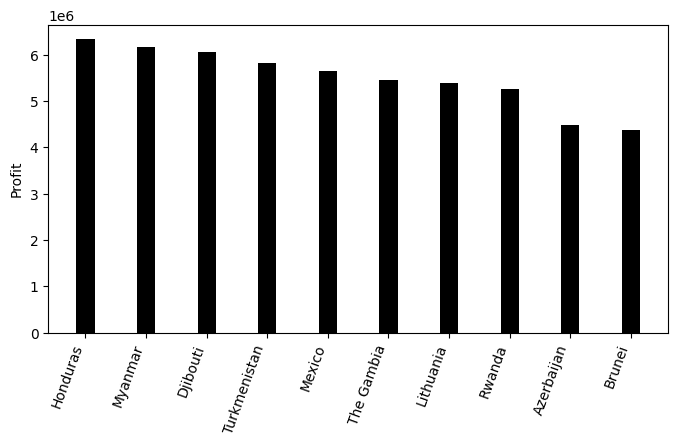

In [41]:
plt.figure(figsize=(8,4))
cr=df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10)
plt.bar(cr.index,cr.values,width=0.3,color='black')
plt.xticks(rotation=70,ha='right')
plt.ylabel('Profit')

In [42]:
common_countries = set(c.index).intersection(set(cr.index))
print(common_countries)

{'Azerbaijan', 'Rwanda', 'Honduras', 'Mexico', 'Myanmar', 'Djibouti'}
